In [2]:
from sklearn.datasets import make_regression

In [15]:
X,y=make_regression(n_samples=2000,n_features=1,noise=10,random_state=42)

In [17]:
X

array([[-0.32163505],
       [-0.06575026],
       [ 0.41901901],
       ...,
       [ 0.40373009],
       [ 2.16500234],
       [ 0.18334201]])

In [19]:
y

array([-15.35053868, -14.22368322,  34.40685469, ...,  21.16662325,
        77.43969707,   2.51616257])

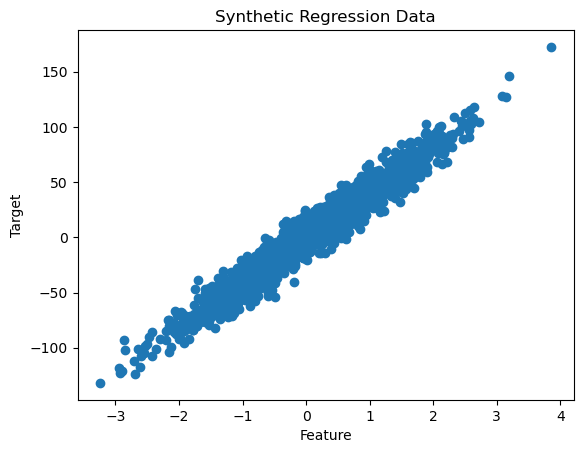

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Synthetic Regression Data')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization,Input


In [37]:
from tensorflow.keras import Regularizer
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model=Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=1))

In [47]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history=model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop])


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1614.2577 - mae: 31.7185 - val_loss: 1694.9250 - val_mae: 32.7391
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1654.3479 - mae: 32.1929 - val_loss: 1678.8840 - val_mae: 32.5759
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1605.7777 - mae: 32.2726 - val_loss: 1662.8018 - val_mae: 32.4099
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1613.7019 - mae: 32.6282 - val_loss: 1644.9797 - val_mae: 32.2256
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1814.9554 - mae: 34.3900 - val_loss: 1625.4999 - val_mae: 32.0221
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1675.3453 - mae: 32.4432 - val_loss: 1604.6895 - val_mae: 31.8020
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1736.3949 - mae: 33.5275 - val_loss: 1580.9441 - val_mae: 31.5495
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1560.3081 - mae: 31.7904 - val_loss: 1555.9727 - val_mae: 31.2815

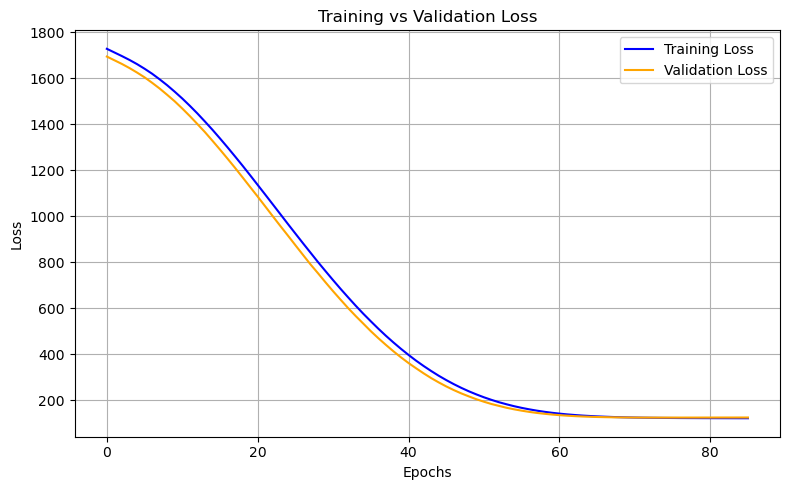

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(1,),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu',
          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history=model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop])


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1410.1868 - mae: 29.5313 - val_loss: 1588.8123 - val_mae: 31.6020
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1054.0408 - mae: 25.6024 - val_loss: 1514.1223 - val_mae: 30.7120
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 824.4258 - mae: 21.7997 - val_loss: 1432.9878 - val_mae: 29.7318
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 727.1840 - mae: 20.3686 - val_loss: 1344.5612 - val_mae: 28.7332
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 547.3759 - mae: 17.9971 - val_loss: 1250.4915 - val_mae: 27.7320
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 455.7680 - mae: 16.0465 - val_loss: 1148.4586 - val_mae: 26.7001
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 417.3904 - mae: 15.5339 - val_loss: 1022.6214 - val_mae: 25.2776
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 290.6674 - mae: 13.2032 - val_loss: 907.7881 - val_mae: 24.0398
Epoch 

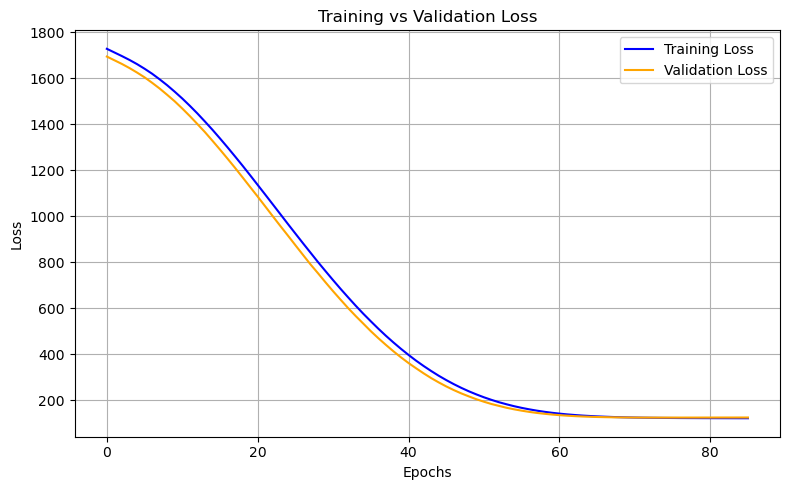

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
